In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
DATA_PATH = '../data/processed'

def load_data(year, img_h=1400, img_w=1400):

    X = []
    y = []

    data_dir = os.path.join(DATA_PATH, str(year))
    frames_dir = os.path.join(data_dir, 'frames')
    masks_dir = os.path.join(data_dir, 'masks')

    for file in sorted(os.listdir(frames_dir)):
        if file.startswith('R'):
            filename = file.split('.')[0]

            frame = np.load(os.path.join(frames_dir, filename + '.npy'))
            mask = np.load(os.path.join(masks_dir, filename + '_labels.npy'))
            X.append(frame[:img_h, :img_w, :])
            y.append(mask[:img_h, :img_w])

    X = np.array(X)
    y = np.array(y)

    return X, y

def plot_image(image, factor=1):
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    plt.xticks([])
    plt.yticks([])
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)
        
    plt.savefig('figures/labels_sample', bbox_inches='tight')

## Loading processing 2017 data

In [17]:
X, y = load_data(2017)

print("X shape:", X.shape) # (number of images, height, width, number of channels)
print("y shape:", y.shape) # (number of images, height, width)

X shape: (30, 1400, 1400, 13)
y shape: (30, 1400, 1400)


## Plotting sample satellite image

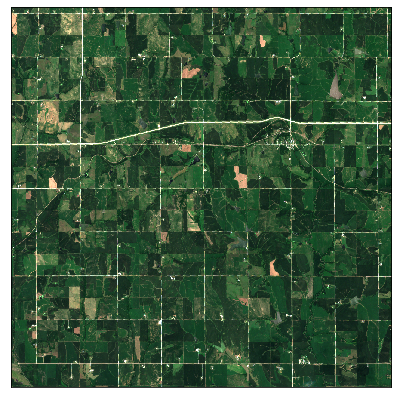

In [30]:
# from image_processing import plot_image

X_sample = X[1]
y_sample = y[1]

plot_image(X_sample[:, :, [3,2,1]], factor=5)

## Plotting sample satellite image corn mask (labels)

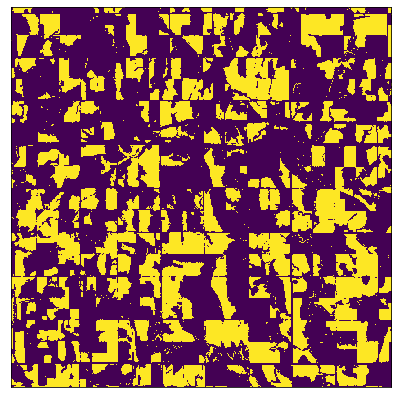

In [32]:
plot_image(y_sample)

In [21]:
np.count_nonzero(y)/y.size

0.3094710034013605